<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [40]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [41]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 

#### Read the dataset in the csv file from the URL


In [42]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [43]:
#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [44]:
boston_df=pd.read_csv(boston_url)

In [45]:
#TASK1: To familiarise with the dataset provided.

boston_df.head()
boston_df.shape

(506, 14)

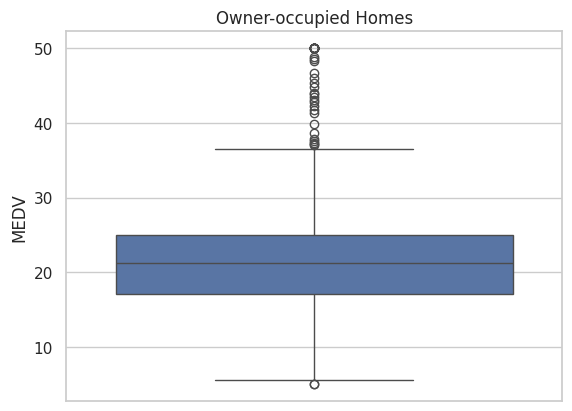

In [46]:
#TASK2: Generate Descriptive Statistics and Visualizations
# Median value of owner-occupied homes
ax = sns.boxplot(y='MEDV', data=boston_df)

ax.set_title('Owner-occupied Homes')
plt.show()

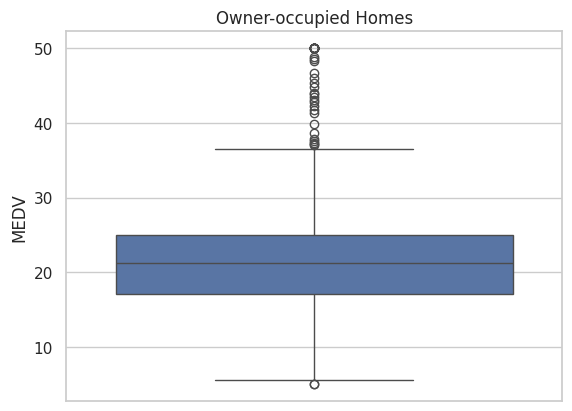

In [47]:
#TASK2: Generate Descriptive Statistics and Visualizations
# Median value of owner-occupied homes
ax = sns.boxplot(y='MEDV', data=boston_df)

ax.set_title('Owner-occupied Homes')
plt.show()

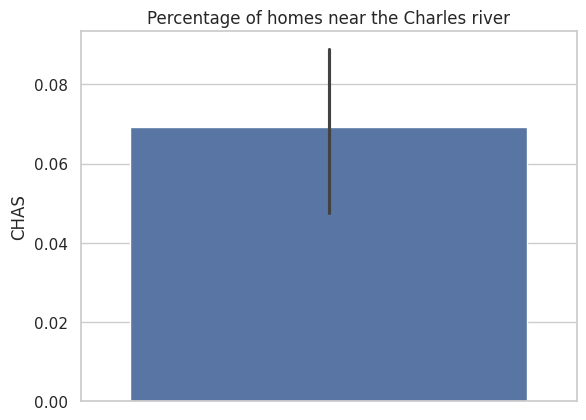

In [48]:
# Bar plot for the Charles river variable

sns.set(style="whitegrid")
ax2 = sns.barplot (y="CHAS", data=boston_df)
ax2.set_title('Percentage of homes near the Charles river')

plt.show()

In [49]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

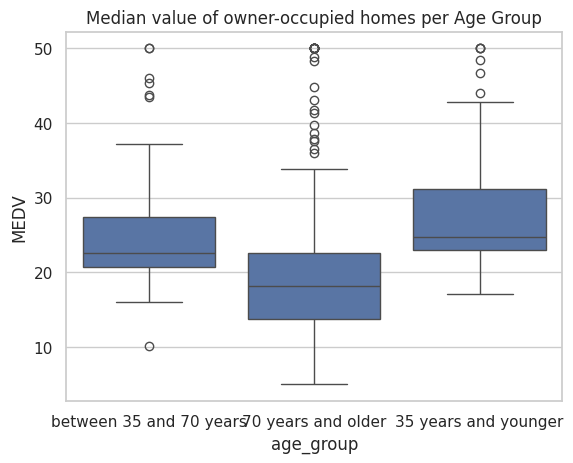

In [50]:
ax3 = sns.boxplot(x='age_group', y="MEDV", data=boston_df)
ax3.set_title('Median value of owner-occupied homes per Age Group')
plt.show()

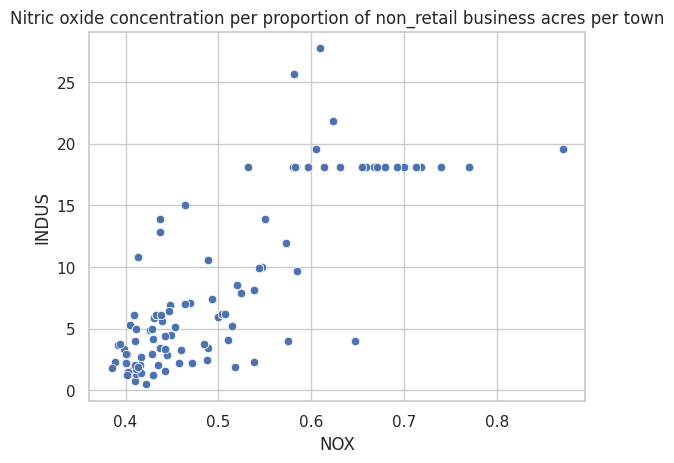

In [51]:
ax4 = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
ax4.set_title('Nitric oxide concentration per proportion of non_retail business acres per town')
plt.show()

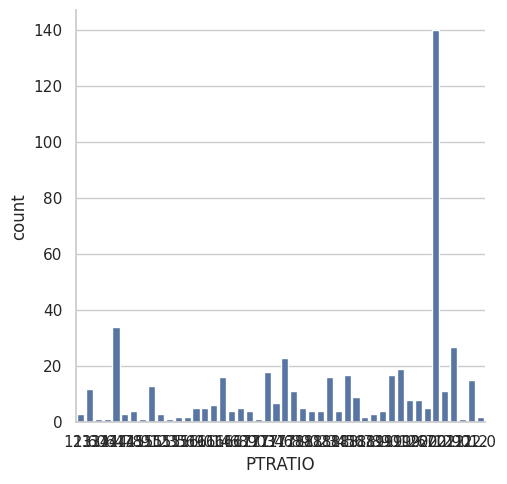

In [52]:
sns.catplot(x='PTRATIO', kind='count', data=boston_df)
ax.set_title('Pupil to teacher ratio per town')
plt.show()

In [53]:
# Task3: Use the appropriate tests to answer the questions provided.

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)?

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='median')

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [54]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [55]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)?
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                    boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
                     center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [56]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)?

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [57]:

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)?
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
prediction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        00:13:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#The project has been completed, with all the tasks, individually clarified along with their subparts.